# Assignment1 jupyter notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.cluster import KMeans
from scipy.stats import skew

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
# data
df = pd.read_csv("C:/Users/DELL/Downloads/customers_dataset.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


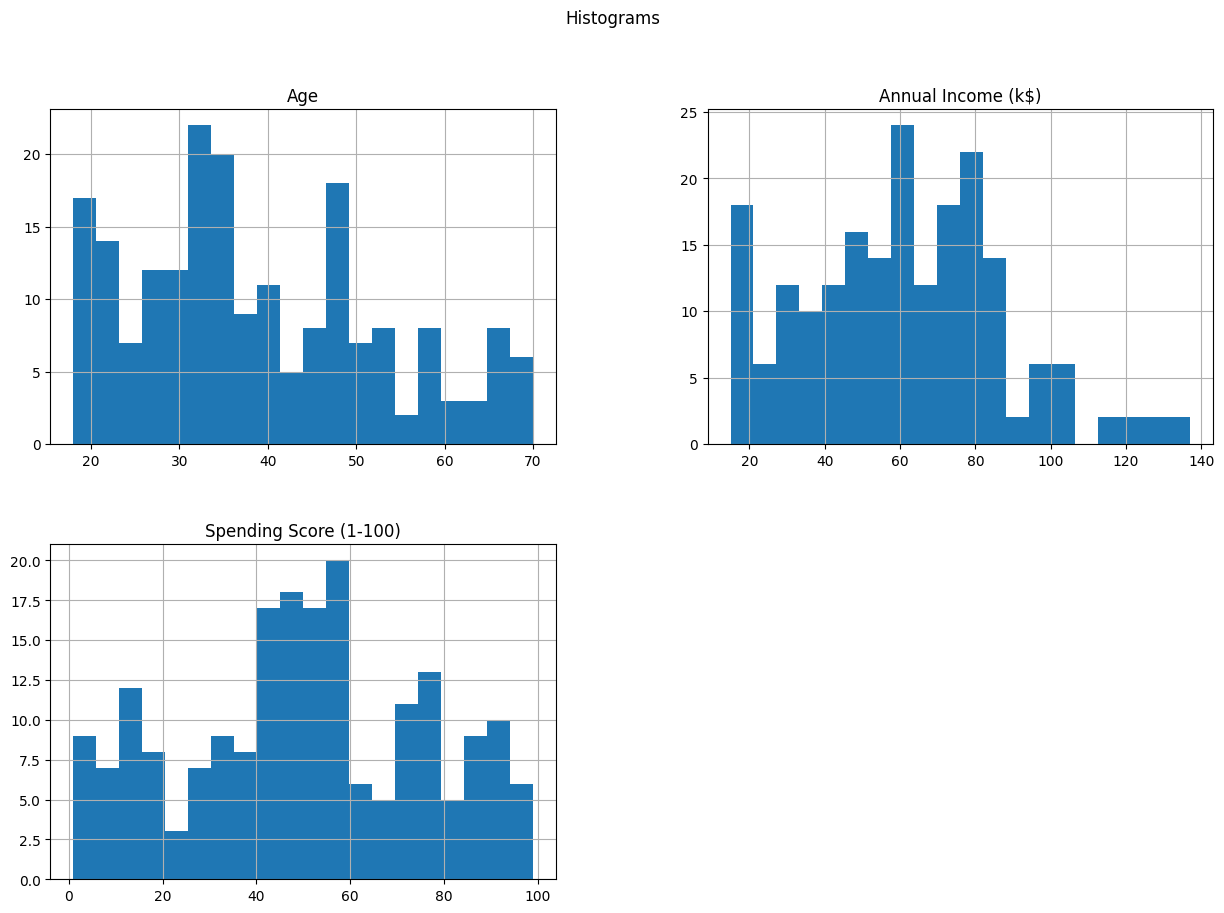

In [20]:
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms")
plt.show()

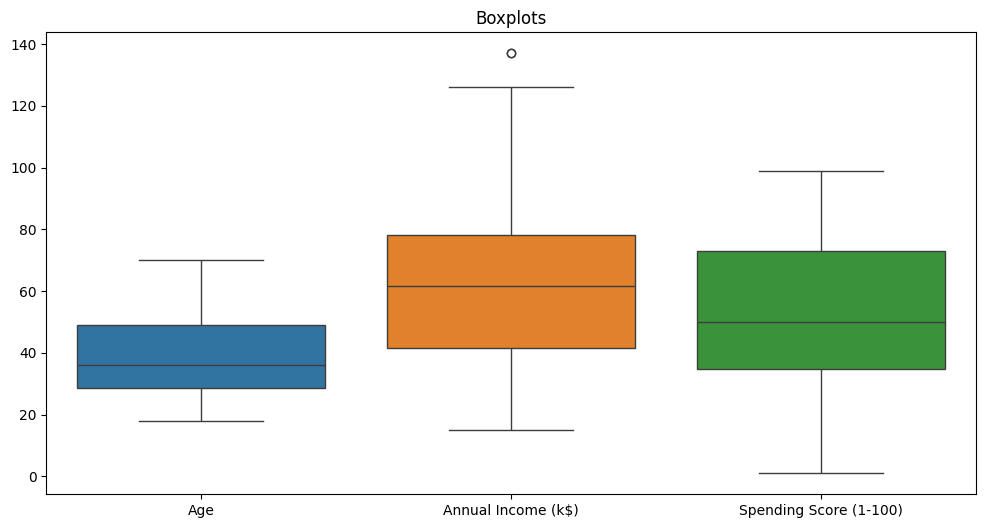

In [4]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.title("Boxplots")
plt.show()

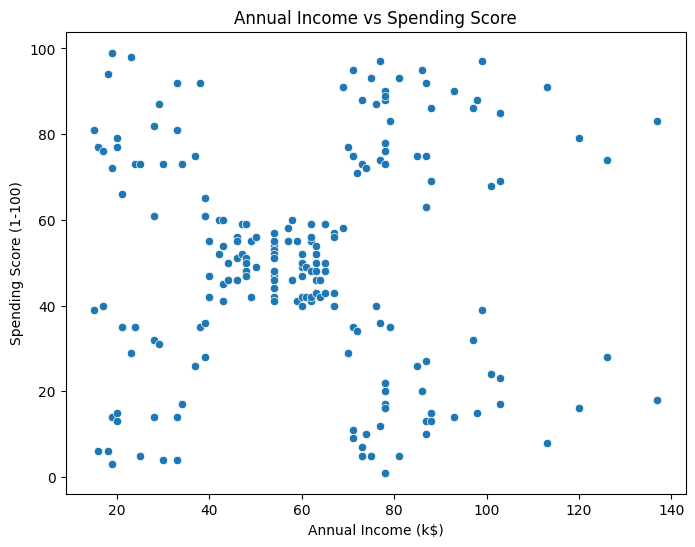

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title("Annual Income vs Spending Score")
plt.show()

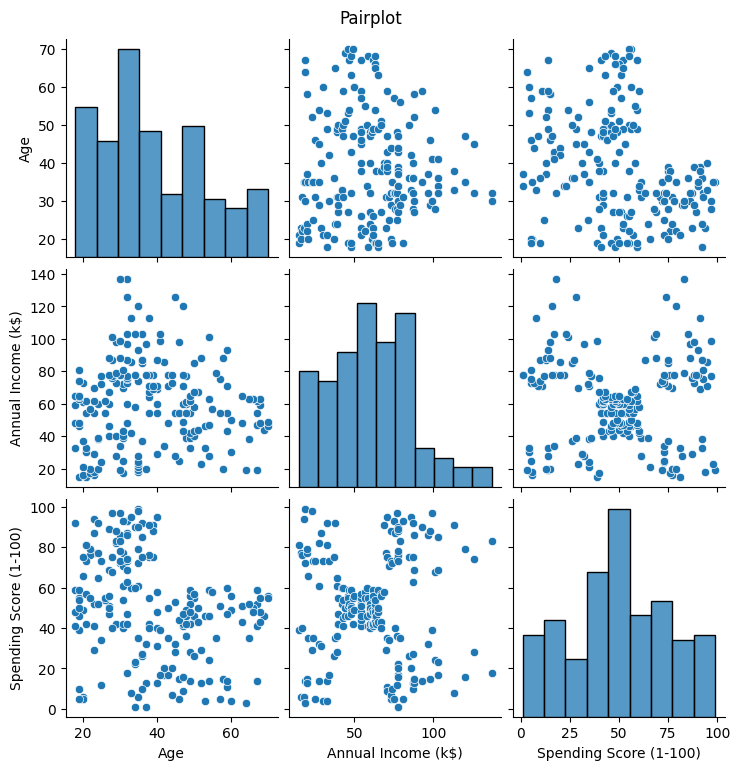

In [6]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle("Pairplot", y=1.02)
plt.show()

In [7]:
# skewness
for col in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    print(f"{col} Skewness: {skew(df[col]):.3f}")

Age Skewness: 0.482
Annual Income (k$) Skewness: 0.319
Spending Score (1-100) Skewness: -0.047


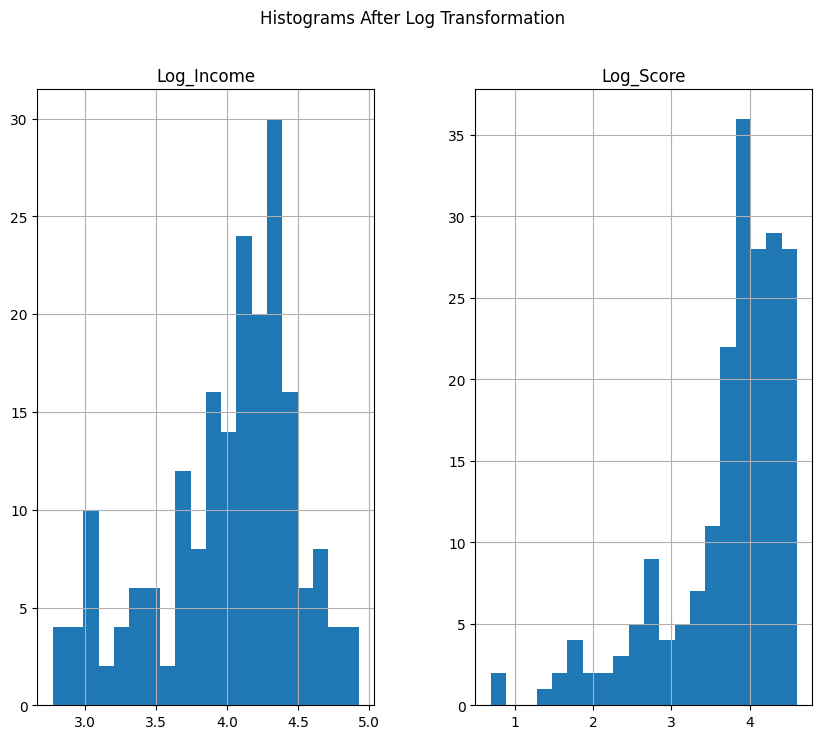

In [23]:
# Log Transform
df['Log_Income'] = np.log1p(df['Annual Income (k$)'])
df['Log_Score'] = np.log1p(df['Spending Score (1-100)'])

df[['Log_Income', 'Log_Score']].hist(bins=20, figsize=(10, 8))
plt.suptitle("Histograms After Log Transformation")
plt.show()

In [9]:
# Scaling using Standardscaler and minmaxcaler
scaling_std = StandardScaler()
scaling_minmax = MinMaxScaler()

df[['Income_Std', 'Score_Std']] = scaling_std.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df[['Income_MinMax', 'Score_MinMax']] = scaling_minmax.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])

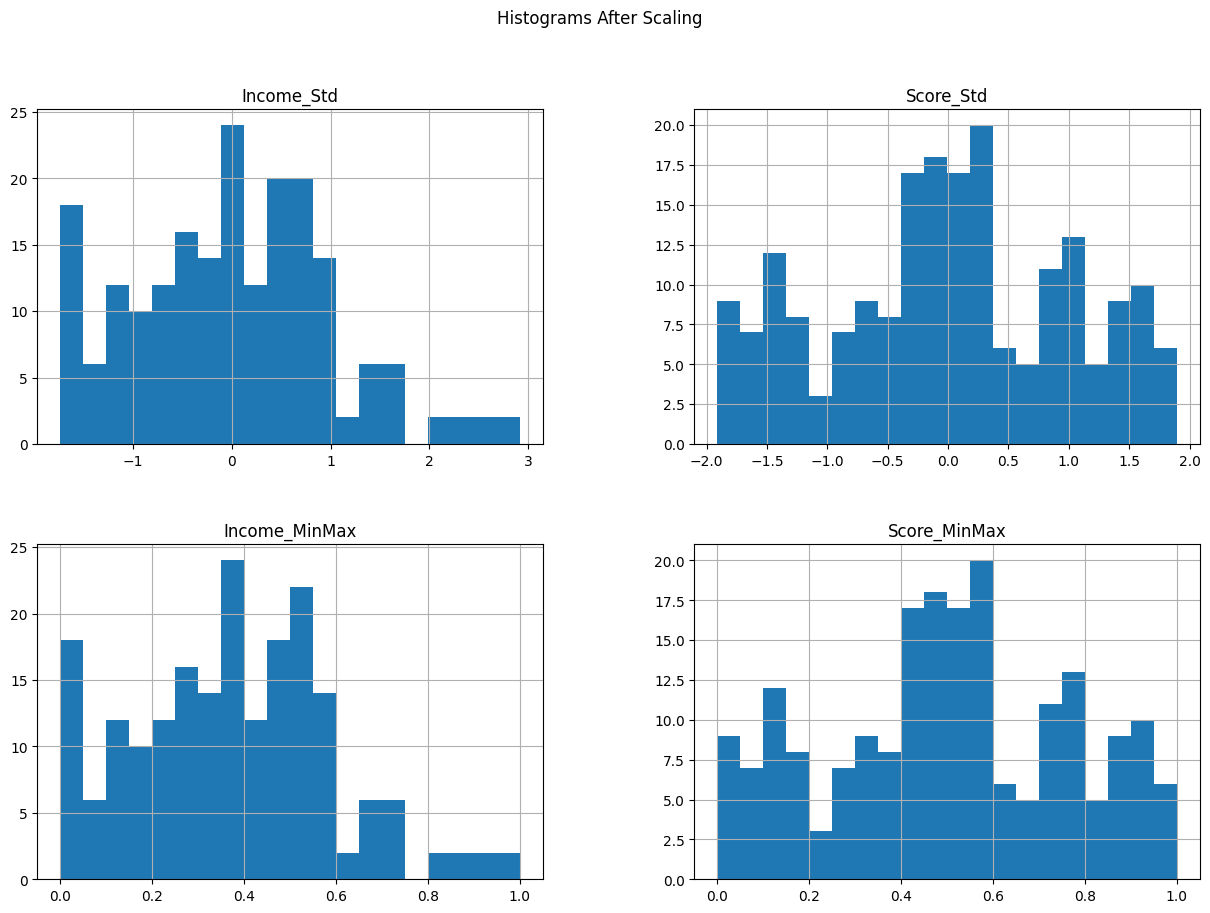

In [17]:
df[['Income_Std', 'Score_Std', 'Income_MinMax', 'Score_MinMax']].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms After Scaling")
plt.show()

# Clustering with K-mean

In [11]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

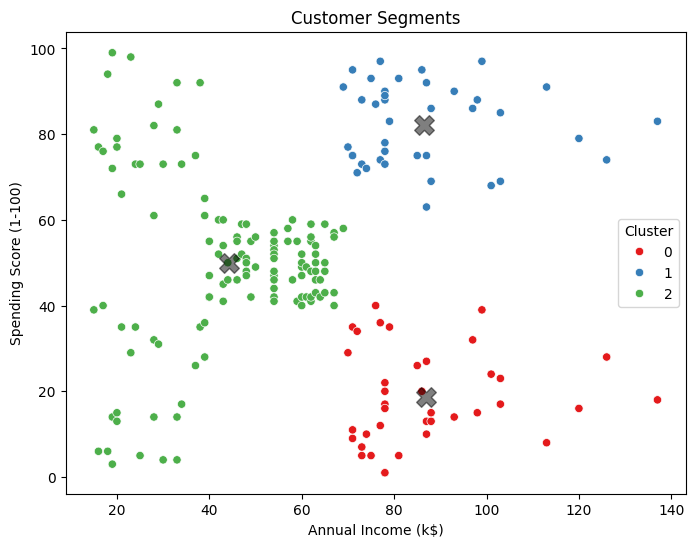

In [12]:
# ploting
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1')
cc = kmeans.cluster_centers_
plt.scatter(cc[:, 0], cc[:, 1], c='black', s=200, alpha=0.5, marker='X')
plt.title("Customer Segments")
plt.show()

# Stretch Goals

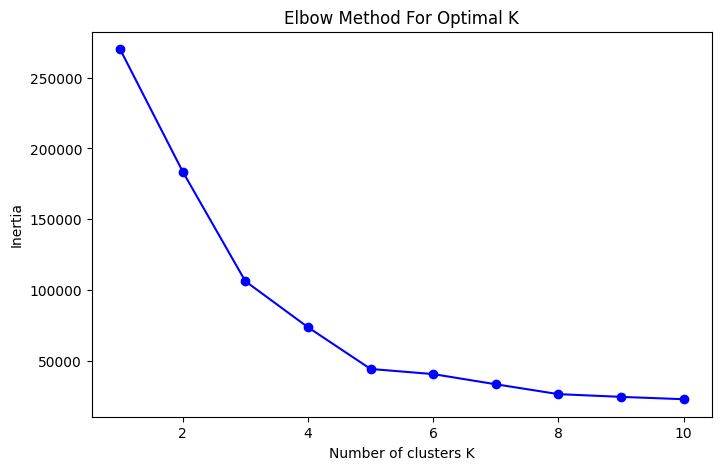

In [13]:
# Elbow Method for optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

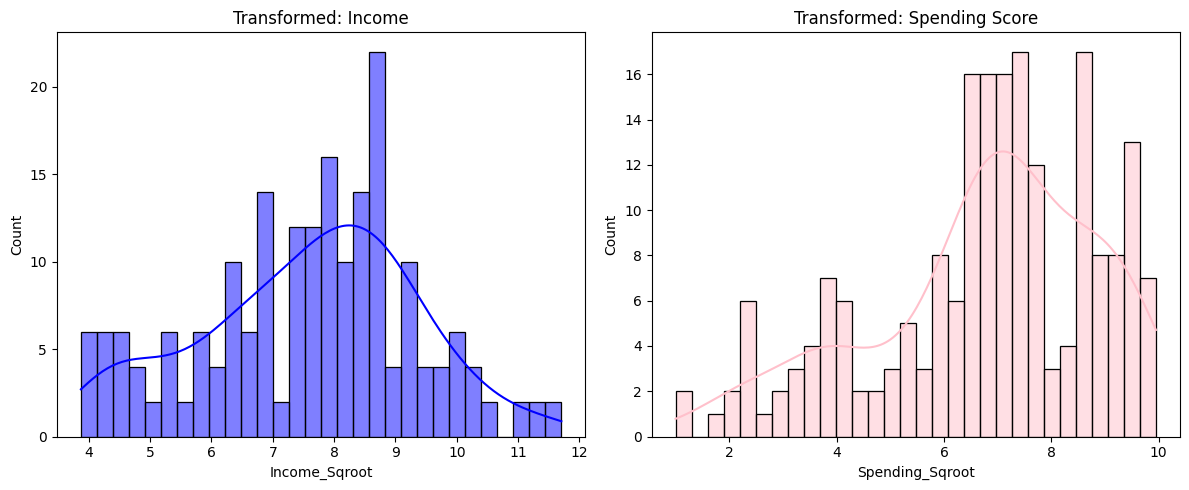

Skewness after square root transformation:
Income_Sqroot     -0.23029
Spending_Sqroot   -0.70979
dtype: float64


In [14]:
# square root method

df['Income_Sqroot'] = np.sqrt(df['Annual Income (k$)'])
df['Spending_Sqroot'] = np.sqrt(df['Spending Score (1-100)'])
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Income_Sqroot'], kde=True, bins=30, color='blue')
plt.title('Transformed: Income')

plt.subplot(1, 2, 2)
sns.histplot(df['Spending_Sqroot'], kde=True, bins=30, color='pink')
plt.title('Transformed: Spending Score')
plt.tight_layout()
plt.show()

# after transformation
print("Skewness after square root transformation:")
print(df[['Income_Sqroot', 'Spending_Sqroot']].skew())



# Summary
1. what features were skewed = 3 things were skewed age,income and spending score.{in square root method it is only for positive skewed data}
   Age Skewness: 0.482
   Annual Income (k$) Skewness: 0.319
   Spending Score (1-100) Skewness: -0.047
2. cluster have centres which help us to study the graph at average.